<a href="https://colab.research.google.com/github/nikil2000/lab-2/blob/main/ex_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1, l2
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np



Load the MNIST dataset

In [39]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [7 3 8 6 8 9 6 4 7 0]


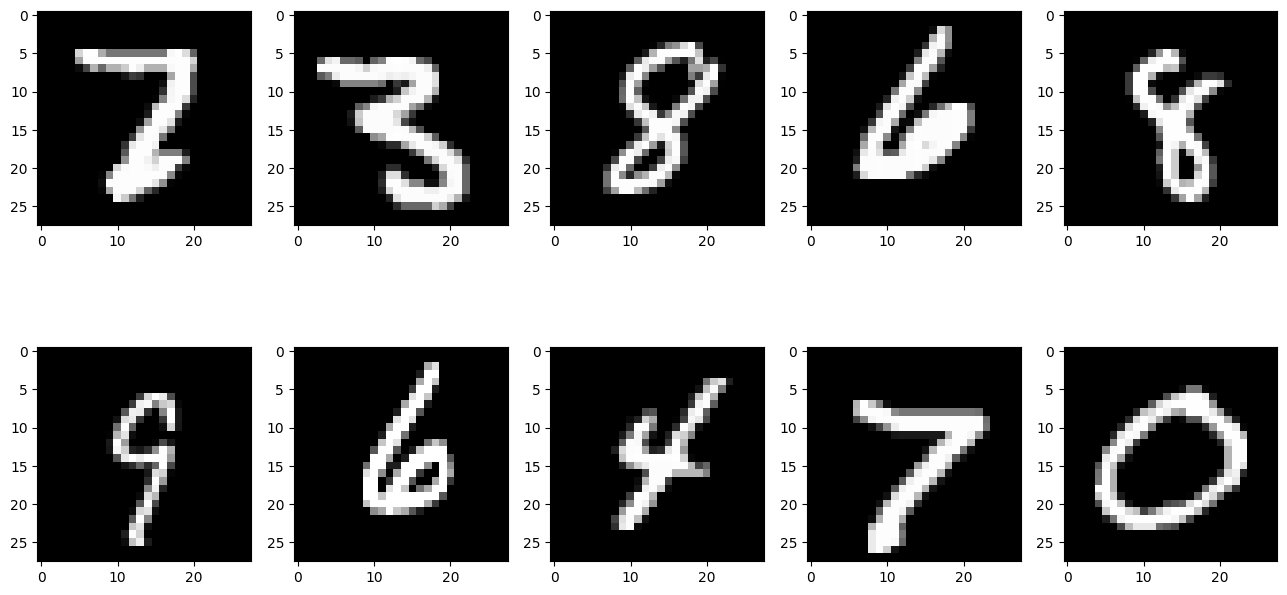

In [40]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [41]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [42]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(256,activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(128,input_dim=64,activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(64,input_dim=64,activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 256)               200960    
                                                                 
 dense_33 (Dense)            (None, 128)               32896     
                                                                 
 dense_34 (Dense)            (None, 64)                8256      
                                                                 
 dense_35 (Dense)            (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


Train the model

In [44]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 3.3033 - accuracy: 0.7424
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1.4665 - accuracy: 0.8082
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1.3611 - accuracy: 0.8222
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 1.3080 - accuracy: 0.8300
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 1.2723 - accuracy: 0.8340
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1.2409 - accuracy: 0.8404
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1.2055 - accuracy: 0.8480
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1.1752 - accuracy: 0.8550
Epoch 9/10
1875/1875 [==============================] - 16s 8ms/step - loss: 1.1492 - accuracy: 0.8587
Epoch 10/10
1875/1875 [==============================] - 16s 8ms/step - l

Plot the loss and accuracy graphs

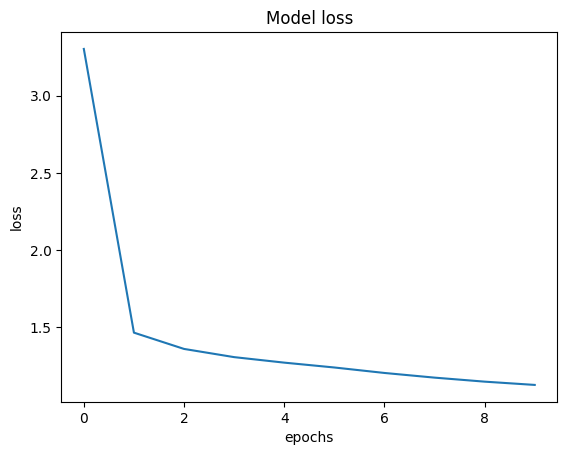

In [45]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

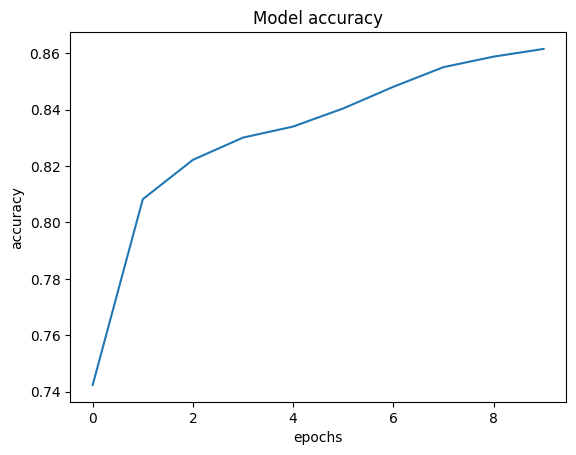

In [46]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [47]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 4ms/step - loss: 1.1786 - accuracy: 0.8381
Loss of the Test dataset is: 1.1785950660705566
Accuracy of the test dataset is: 0.838100016117096


Save the model weights

In [48]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

In [49]:
predictions = model.predict(new_test_data)
predicted_classes = np.argmax(predictions, axis=1)

313/313 [==============================] - 2s 4ms/step


In [50]:
conf_matrix = confusion_matrix(test_target, predicted_classes)

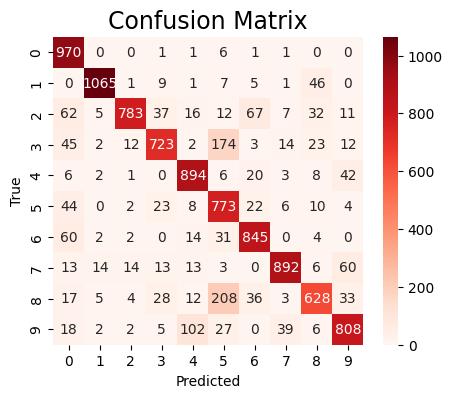

In [63]:
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted',fontsize=10)
plt.ylabel('True',fontsize=10)
plt.title('Confusion Matrix',fontsize=17)
plt.show()